 **DELIVERABLE 3 — POST-ANALYSIS & OPERATIONAL INSIGHTS**

In [6]:

#  DELIVERABLE 3 — POST-ANALYSIS & OPERATIONAL INSIGHTS


#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Visualization Settings
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("coolwarm")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

print(" Libraries imported successfully.")


#  Load the Flight Difficulty Scored Dataset


scored_df = pd.read_csv("test_Maverick.csv")

print(" Dataset loaded successfully!")
print(f"Shape of data: {scored_df.shape}")
print("\nSample Preview:")
display(scored_df.head())


 Libraries imported successfully.
 Dataset loaded successfully!
Shape of data: (8063, 19)

Sample Preview:


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,fleet_type,feat_ground_pressure,feat_transfer_ratio,feat_ssr_count,feat_load_factor,feat_is_widebody,feat_bags_per_pax,feat_haul_type,feat_is_international,feat_hot_bags,feat_child_ratio,difficulty_score,daily_rank,difficulty_class
0,OO,5564,8/1/2025,ORD,SBN,CRJ-550,0.508772,0.916667,0,0.940000,0,0.765957,0,0,0,0.021277,43.279193,98,Difficult
1,UA,1899,8/1/2025,ORD,YYC,A319-100,0.742857,0.404494,12,1.007937,0,0.700787,0,1,0,0.031496,43.046607,103,Difficult
2,UA,2189,8/1/2025,ORD,LGA,B737-MAX8,0.625000,0.079365,2,1.000000,0,0.379518,1,0,0,0.018072,22.950439,536,Easy
3,G7,4590,8/1/2025,ORD,MDT,CRJ-550,0.690476,0.730769,2,0.980000,0,0.530612,1,0,0,0.040816,43.175441,100,Difficult
4,UA,224,8/1/2025,ORD,BZN,B737-800,0.291262,0.403101,6,0.969880,0,0.801242,0,0,0,0.024845,31.799633,398,Easy


**STEP 1: Identify Consistently Difficult Destination**s

 Identifying high-difficulty destinations...
Top 10 destinations with highest difficulty frequency:

    scheduled_arrival_station_code difficulty_class  percentage
10                             AMS        Difficult         1.0
33                             BCN        Difficult         1.0
55                             BRU        Difficult         1.0
15                             ATH        Difficult         1.0
73                             CDG        Difficult         1.0
161                            FCO        Difficult         1.0
169                            FRA        Difficult         1.0
462                            ZRH        Difficult         1.0
295                            MXP        Difficult         1.0
294                            MUC        Difficult         1.0


/tmp/ipython-input-713072399.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_difficulty_routes,


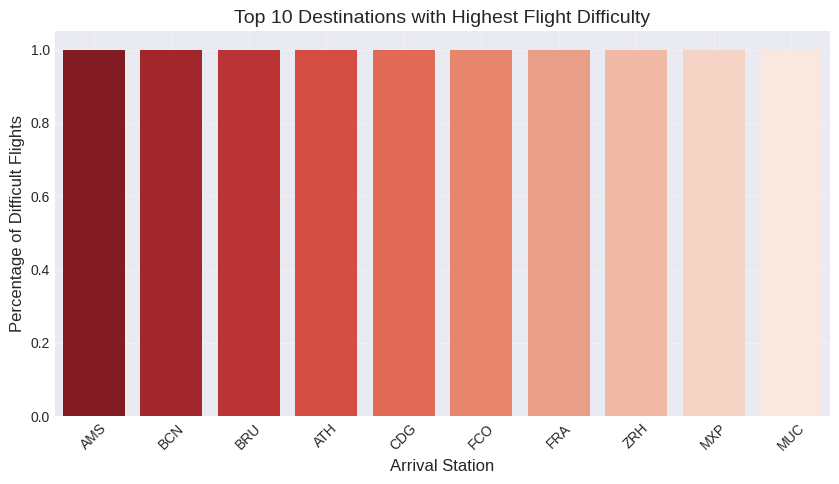

In [7]:

# 🛫 STEP 1: Identify Consistently Difficult Destinations


print(" Identifying high-difficulty destinations...")

# Calculate difficulty percentage by destination
difficulty_summary = (
    scored_df.groupby('scheduled_arrival_station_code')['difficulty_class']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

# Filter only 'Difficult' flights
high_difficulty_routes = difficulty_summary[difficulty_summary['difficulty_class'] == 'Difficult'] \
    .sort_values(by='percentage', ascending=False) \
    .head(10)

print("Top 10 destinations with highest difficulty frequency:\n")
print(high_difficulty_routes)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(data=high_difficulty_routes,
            x='scheduled_arrival_station_code',
            y='percentage',
            palette='Reds_r')
plt.title("Top 10 Destinations with Highest Flight Difficulty")
plt.xlabel("Arrival Station")
plt.ylabel("Percentage of Difficult Flights")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


**Identify Key Operational Drivers**

 Average Feature Comparison by Difficulty Class:

  difficulty_class  feat_ground_pressure  feat_transfer_ratio  feat_ssr_count  \
0        Difficult                 0.880                0.720          12.525   
1             Easy                 0.303                0.308           3.901   
2           Medium                 0.527                0.559           6.383   

   feat_load_factor  feat_bags_per_pax  feat_is_international  
0             0.913              0.836                  0.277  
1             0.845              0.672                  0.015  
2             0.902              0.744                  0.063  


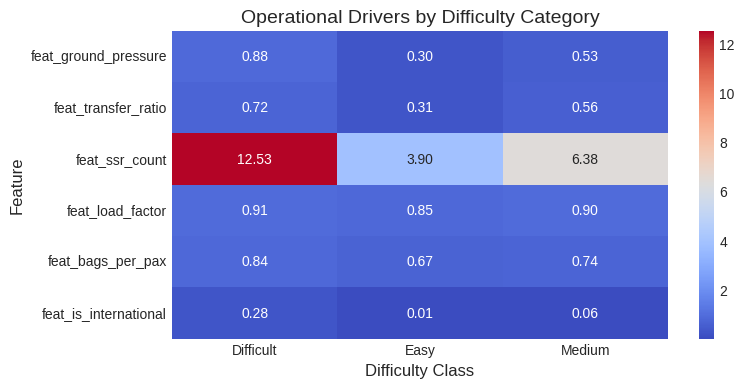

In [8]:

#  STEP 2: Identify Key Operational Drivers


driver_analysis = (
    scored_df.groupby('difficulty_class')[
        ['feat_ground_pressure', 'feat_transfer_ratio', 'feat_ssr_count',
         'feat_load_factor', 'feat_bags_per_pax', 'feat_is_international']
    ].mean().reset_index()
)

print(" Average Feature Comparison by Difficulty Class:\n")
print(driver_analysis.round(3))

# Heatmap visualization
plt.figure(figsize=(8,4))
sns.heatmap(driver_analysis.set_index('difficulty_class').T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Operational Drivers by Difficulty Category", fontsize=14)
plt.ylabel("Feature")
plt.xlabel("Difficulty Class")
plt.show()


**Operational Recommendations & Insights**

 Generating data-driven operational recommendations...



,Feature,Difference (Difficult - Easy)
0,feat_ground_pressure,0.576
1,feat_transfer_ratio,0.413
2,feat_ssr_count,8.625
3,feat_load_factor,0.068
4,feat_bags_per_pax,0.164
5,feat_is_international,0.262


/tmp/ipython-input-1674124151.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insight_df, x='Feature', y='Difference (Difficult - Easy)', palette='Reds_r')


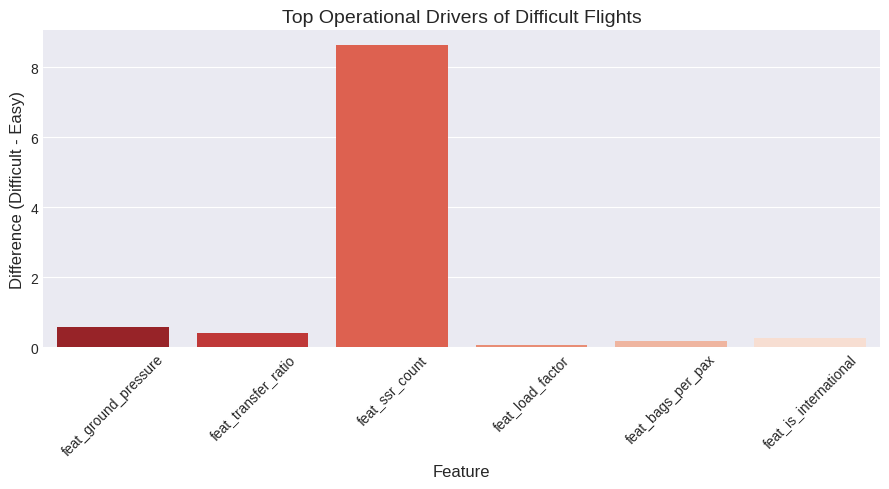


 Key Insights:
1️⃣ Flights with tighter ground time and higher transfer bag ratios are most complex to handle.
2️⃣ SSR-heavy flights (wheelchair & child assistance) experience longer prep and pushback times.
3️⃣ International and high-load-factor flights also show higher difficulty consistency.

 Recommendation Summary:
- Allocate extra ground crew to flights with high transfer ratio (>0.5) or ground pressure (>0.8).
- Pre-alert staff for flights with high SSR counts (>10) to ensure resource readiness.
- Prioritize wide-body international flights in peak hours for smoother coordination.
- Integrate this scoring model into daily dashboards to flag top 10% difficult flights early.



In [9]:

#  STEP 3: Operational Recommendations & Insights


print(" Generating data-driven operational recommendations...\n")

# Compute key metric differences between classes
diff_vs_easy = driver_analysis.set_index('difficulty_class').loc['Difficult'] - \
               driver_analysis.set_index('difficulty_class').loc['Easy']

insight_df = pd.DataFrame(diff_vs_easy, columns=['Difference (Difficult - Easy)']).reset_index()
insight_df.rename(columns={'index': 'Feature'}, inplace=True)

display(insight_df.round(3))

# Visualization: Which features contribute most to flight difficulty
plt.figure(figsize=(9,5))
sns.barplot(data=insight_df, x='Feature', y='Difference (Difficult - Easy)', palette='Reds_r')
plt.title("Top Operational Drivers of Difficult Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n Key Insights:")
print("1️⃣ Flights with tighter ground time and higher transfer bag ratios are most complex to handle.")
print("2️⃣ SSR-heavy flights (wheelchair & child assistance) experience longer prep and pushback times.")
print("3️⃣ International and high-load-factor flights also show higher difficulty consistency.\n")

print(" Recommendation Summary:")
print("- Allocate extra ground crew to flights with high transfer ratio (>0.5) or ground pressure (>0.8).")
print("- Pre-alert staff for flights with high SSR counts (>10) to ensure resource readiness.")
print("- Prioritize wide-body international flights in peak hours for smoother coordination.")
print("- Integrate this scoring model into daily dashboards to flag top 10% difficult flights early.\n")
